In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# openpyxl

# 1 ETL

## 1.1 Carga de los datos

In [2]:
lesiones_df = pd.read_excel('..\Archivos_xlsx\lesiones.xlsx')

## 1.2 Formatos y tipos

In [3]:
lesiones_df.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [4]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [5]:
lesiones_df['altura'] = lesiones_df['altura'].astype(object)

In [6]:
lesiones_df['fecha'] = pd.to_datetime(lesiones_df['fecha'])

In [7]:
lesiones_df['acusado'] = lesiones_df['acusado'].astype('category')
lesiones_df['victima'] = lesiones_df['victima'].astype('category')

In [8]:
lesiones_df['moto'] = lesiones_df['moto'].replace({'SD': False, 'x': True}).astype(bool)
lesiones_df['auto'] = lesiones_df['auto'].replace({'SD': False, 'x': True}).astype(bool)
lesiones_df['transporte_publico'] = lesiones_df['transporte_publico'].replace({'SD': False, 'x': True}).astype(bool)
lesiones_df['camion'] = lesiones_df['camion'].replace({'SD': False, 'x': True}).astype(bool)
lesiones_df['ciclista'] = lesiones_df['ciclista'].replace({'SD': False, 'x': True}).astype(bool)
lesiones_df['gravedad'] = lesiones_df['gravedad'].replace({'SD': False, 'x': True}).astype(bool)


In [9]:
lesiones_df['tipo_calle'] = lesiones_df['tipo_calle'].astype('category')

In [10]:
lesiones_df['latutid'] = pd.to_numeric(lesiones_df['latutid'], errors='coerce')
lesiones_df['longitud'] = pd.to_numeric(lesiones_df['longitud'], errors='coerce')

## 1.3 Valores nulos

In [11]:
null_counts = lesiones_df.isnull().sum()

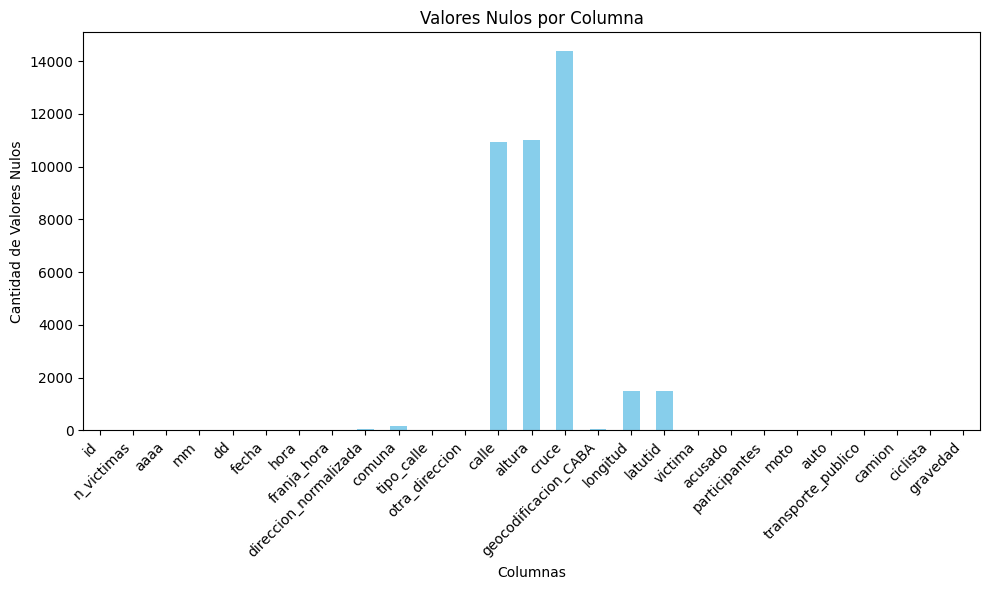

In [12]:
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
lesiones_df.loc[lesiones_df['altura'].isna(), 'altura'] = 'SD'

In [14]:
lesiones_df.loc[lesiones_df['calle'].isna(), 'calle'] = 'SD'

In [15]:
lesiones_df.loc[lesiones_df['cruce'].isna(), 'cruce'] = 'SD'

In [16]:
lesiones_df.loc[lesiones_df['direccion_normalizada'].isna(), 'direccion_normalizada'] = 'SD'

Rellanamos nulos con 'SD'

In [17]:
lesiones_df['latutid'] = lesiones_df['latutid'].interpolate(method='linear')
lesiones_df['longitud'] = lesiones_df['longitud'].interpolate(method='linear')

Rellenando nulos en ```latutid``` y ```longitud``` con la función `interpolate()` de Pandas

In [18]:
moda = lesiones_df['comuna'].mode()[0]
lesiones_df['comuna'] = lesiones_df['comuna'].fillna(moda)

Rellenamos nulos en la columna `comuna` con la moda de la misma

## 1.4 Registros duplicados

In [19]:
lesiones_df.duplicated().value_counts()

False    23785
Name: count, dtype: int64

Comprobamos si hay registros duplicados y no encontramos ninguno

## 1.4 Analisis columna por columna

### 1.4.1 ```id```

In [20]:
lesiones_df.set_index(pd.Index(range(2000, 2000 + len(lesiones_df))), inplace=True)
lesiones_df.rename_axis('ID', inplace=True)

Creamos un nuevo indece que funcione como identificador unico y que empiece en el valor 2000

In [21]:
lesiones_df.drop(columns='id', inplace=True)

Eliminamos la columna que funcionaba como indentificador antes del cambio

### 1.4.2 ```fecha``` y ```hora```

In [22]:
def combinar_fecha_y_hora(df, columna_fecha, columna_hora, nueva_columna):
    """
    Función para combinar una columna de fecha y una columna de hora en una nueva columna de tipo datetime64.
    
    Parámetros:
        - df: DataFrame de pandas.
        - columna_fecha: Nombre de la columna que contiene las fechas.
        - columna_hora: Nombre de la columna que contiene las horas.
        - nueva_columna: Nombre de la nueva columna que se creará para combinar fecha y hora.
        
    Retorna:
        El DataFrame original con la nueva columna añadida.
    """

    # Combina la fecha y la hora en una nueva columna
    df[nueva_columna] = pd.to_datetime(df[columna_fecha].astype(str) + ' ' + df[columna_hora].astype(str), errors='coerce')
    
    return df

In [23]:
lesiones_df = combinar_fecha_y_hora(lesiones_df, 'fecha', 'hora', 'FECHA_Y_HORA')

Combinamos la columna ```fecha``` y ```hora``` en una nueva llamada ```FECHA_Y_HORA```

In [24]:
lesiones_df.drop(columns=['aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora'], inplace=True)

Eliminamos columnas redundantes

### 1.4.3 ```otra_direccion```, ```tipo_calle``` y ```calle```

In [25]:
def rellenar_con_otra_columna(df, columna_rellenar, columnas_referencia):
    """
    Rellena los valores de una columna con los valores de otra columna si el valor original es 'SD',
    pero si ambos valores son 'SD', se mantiene el valor original.
    
    Parámetros:
        - df: DataFrame de Pandas.
        - columna_rellenar: Nombre de la columna que se va a rellenar si su valor es 'SD'.
        - columnas_referencia: Lista de nombres de columnas que se utilizarán como referencia para el relleno si corresponde.
    
    Retorna:
        El DataFrame modificado.
    """
    # Copia el DataFrame para evitar modificar el original
    df = df.copy()
    
    # Máscara para identificar las filas donde la columna a rellenar es 'SD' y al menos una columna de referencia no es 'SD'
    mask = (df[columna_rellenar] == 'SD') & (~(df[columnas_referencia] == 'SD').all(axis=1))
    
    # Rellena los valores de la columna a rellenar con los valores de las columnas de referencia
    df.loc[mask, columna_rellenar] = df.loc[mask, columnas_referencia].apply(lambda x: x.dropna().iloc[0], axis=1)
    
    # Retorna el DataFrame modificado
    return df


Creamos una funcion para rellenar los valores `SD` en la columna `direccion_normalizada` usando otras columnas como referencia

In [26]:
lesiones_df['otra_direccion'] = lesiones_df['otra_direccion'].str.upper()
lesiones_df['calle'] = lesiones_df['calle'].str.upper()

Transformamos los datos de `otra_direccion` y `calle` a mayusculas

In [27]:
lesiones_df = rellenar_con_otra_columna(lesiones_df, 'direccion_normalizada', ['otra_direccion', 'calle'])

In [28]:
# Imprimir la cantidad de 'SD'
print((lesiones_df['direccion_normalizada'] == 'SD').sum())

5378


Aplicamos la funcion y vemos cuantos valores `SD` quedan

In [29]:
# Imprimir la cantidad de 'SD'
print((lesiones_df['tipo_calle'] == 'SD').sum())

11045


Comprobamos los valores `SD` dentro de `tipo_calle`

In [30]:
lesiones_df.loc[lesiones_df['tipo_calle'] == 'GRAL PAZ', 'tipo_calle'] = 'AUTOPISTA'

Corregimos valores ya que `la Gral. Paz` es una autopista

In [31]:
# Calcular la frecuencia de cada categoría excluyendo 'SD'
freq_dist = lesiones_df[lesiones_df['tipo_calle'] != 'SD']['tipo_calle'].value_counts(normalize=True)

# Obtener las categorías existentes y sus frecuencias
categorias = freq_dist.index
frecuencias = freq_dist.values

# Generar valores aleatorios de acuerdo a la distribución de frecuencia
valores_aleatorios = np.random.choice(categorias, p=frecuencias, size=len(lesiones_df))

# Reemplazar solo los valores 'SD' con los valores aleatorios generados
lesiones_df['TIPO_DE_CALLE_IMPUTADO'] = lesiones_df['tipo_calle'].mask(lesiones_df['tipo_calle'] == 'SD', valores_aleatorios)


Creamos una columna llamada `TIPO_DE_CALLE_IMPUTADO` que imputa los valores `SD` manteniendo la distribucion de las categorias.

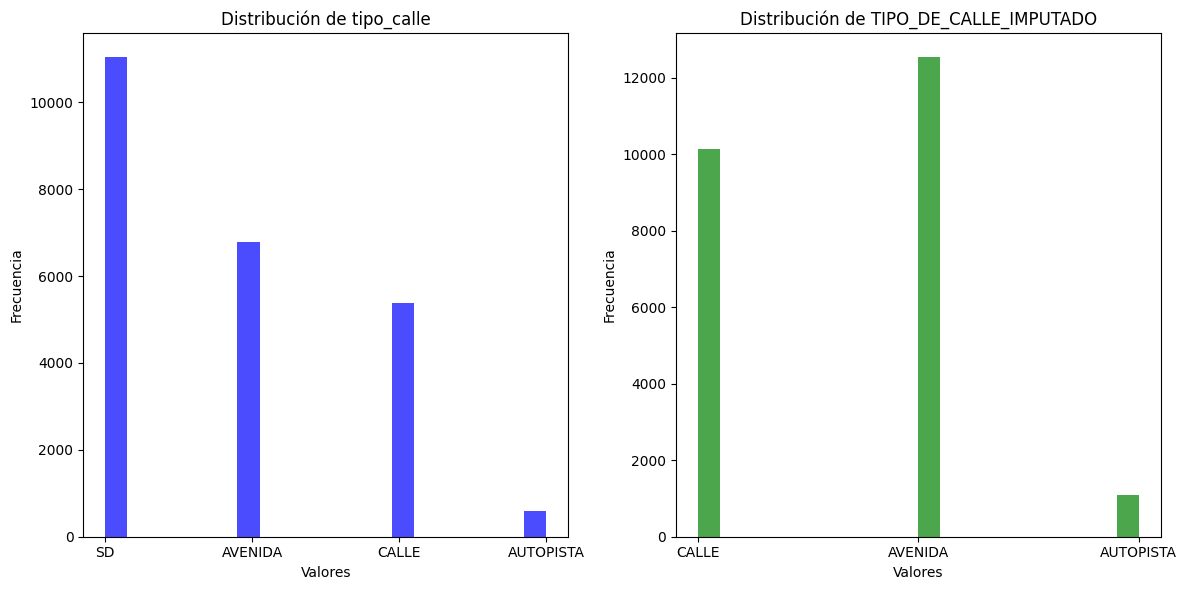

In [32]:
# Crear subtramas
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar histograma de la primera columna
axs[0].hist(lesiones_df['tipo_calle'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Distribución de tipo_calle')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')

# Graficar histograma de la segunda columna
axs[1].hist(lesiones_df['TIPO_DE_CALLE_IMPUTADO'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Distribución de TIPO_DE_CALLE_IMPUTADO')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frecuencia')

# Mostrar gráficos
plt.tight_layout()
plt.show()


Obsevamos como mantiene la distribuciòn aun habiendo imputado los valores `SD`

In [33]:
lesiones_df.drop(columns=['calle', 'otra_direccion', 'altura', 'cruce'], inplace=True)

In [34]:
lesiones_df.rename(columns={'direccion_normalizada': 'LUGAR_DEL_HECHO'}, inplace=True)
lesiones_df.rename(columns={'tipo_calle': 'TIPO_DE_CALLE'}, inplace=True) 
lesiones_df.rename(columns={'comuna': 'COMUNA'}, inplace=True)


In [35]:
lesiones_df['TIPO_DE_CALLE'] = lesiones_df['TIPO_DE_CALLE_IMPUTADO']
lesiones_df.drop(columns='TIPO_DE_CALLE_IMPUTADO', inplace=True)

Eliminamos columnas redundantes y cambiamos el nombre de la columnas

In [36]:
# Eliminar la categoría 'C' específica
lesiones_df['TIPO_DE_CALLE'] = lesiones_df['TIPO_DE_CALLE'].cat.remove_categories(['SD', 'GRAL PAZ'])

### 1.4.4 ```geocodificacion_CABA```, `comuna`, ```longitud``` y ```latutid```

In [37]:
lesiones_df.drop(columns='geocodificacion_CABA', inplace=True)

In [38]:
lesiones_df.rename(columns={'longitud': 'LONGITUD'}, inplace=True)
lesiones_df.rename(columns={'latutid': 'LATITUD'}, inplace=True)

In [39]:
# Convertir valores de longitud y latitud a valores absolutos
print(lesiones_df['LONGITUD'].info())
print(lesiones_df['LATITUD'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 23785 entries, 2000 to 25784
Series name: LONGITUD
Non-Null Count  Dtype  
--------------  -----  
23785 non-null  float64
dtypes: float64(1)
memory usage: 185.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 23785 entries, 2000 to 25784
Series name: LATITUD
Non-Null Count  Dtype  
--------------  -----  
23785 non-null  float64
dtypes: float64(1)
memory usage: 185.9 KB
None


In [40]:
# Verificar si hay valores fuera del rango esperado
valores_fuera_rango = lesiones_df[(lesiones_df['LONGITUD'].abs() > 180) | (lesiones_df['LATITUD'].abs() > 90)]

# Imprimir los valores fuera del rango
print("Valores de longitud y latitud fuera del rango esperado:")
print(valores_fuera_rango[['LONGITUD', 'LATITUD']])

Valores de longitud y latitud fuera del rango esperado:
           LONGITUD       LATITUD
ID                               
25784 -5.829963e+09 -3.472891e+09


In [41]:
lesiones_df.drop(25784, inplace=True)

In [42]:
lesiones_df.loc[lesiones_df['COMUNA'] == 'No Especificada', 'COMUNA'] = 'SD'

In [43]:
lesiones_df['COMUNA'].astype('category')

ID
2000     14
2001      8
2002      8
2003      7
2004      3
         ..
25779     6
25780     9
25781     9
25782     1
25783     5
Name: COMUNA, Length: 23784, dtype: category
Categories (16, object): [1, 2, 3, 4, ..., 13, 14, 15, 'SD']

Corregimos el nombre de las columnas 

### 1.4.5 ```participantes```, `victima` y `acusado`

In [44]:
# Imprimir la cantidad de 'SD'
print((lesiones_df['victima'] == 'SD').sum())
# Imprimir la cantidad de 'SD'
print((lesiones_df['acusado'] == 'SD').sum())

10733
15288


In [45]:
# Reemplaza los espacios en blanco con guiones bajos en la columna 'participantes'
lesiones_df['participantes'] = lesiones_df['participantes'].str.replace(' ', '_')

In [46]:
def revisar_columnas(df, columnas):
    """
    Revisa las 5 columnas especificadas por fila y guarda los nombres de las columnas que son True
    en un string con formato 'columna1-columna2' en una nueva columna.
    
    Parámetros:
        - df: DataFrame de Pandas.
        - columnas: Lista de nombres de las columnas a revisar.
    
    Retorna:
        El DataFrame con una nueva columna que contiene los nombres de las columnas que son True
        separados por guiones, o una cadena vacía si ninguna columna es True.
    """
    # Inicializa una nueva columna con 'SD-SD'
    df['nueva_columna'] = 'SD-SD'
    
    # Itera sobre las filas del DataFrame
    for index, row in df.iterrows():
        # Inicializa una lista para almacenar los nombres de las columnas que son True en la fila actual
        columnas_true = []

        for columna in columnas:
            # Si el valor en la columna contiene el nombre de la columna, asigna True a esa columna
            if columna in row['participantes'].lower():
                df.at[index, columna] = True

        # Verifica cada columna en la lista de columnas
        for columna in columnas:
            # Si el valor en la columna es True, agrega el nombre de la columna a la lista
            if row[columna]:
                columnas_true.append(columna)

        # Divide los participantes por guiones y crea una lista
        participantes = row['participantes'].split('-')
        # Convierte la lista en un conjunto para eliminar duplicados
        participantes_set = set(participantes)
        # Comprueba si la longitud del conjunto es menor que la longitud de la lista original
        if len(participantes_set) < len(participantes):
            columnas_true.append(str(list(participantes_set)[0]))
        
        # Si hay nombres de columnas en la lista, concatena los nombres con guiones y guarda el resultado en la nueva columna
        if columnas_true:

            # Si solo hay un valor True, guarda 'PEATON-columna1'
            if len(columnas_true) == 1:
                df.at[index, 'nueva_columna'] = 'PEATON-' + columnas_true[0]
            # Si hay más de un valor True, guarda los nombres de las columnas separados por guiones
            else:
                df.at[index, 'nueva_columna'] = '-'.join(columnas_true)
    
    # Convierte los valores de la nueva columna a mayúsculas
    df['nueva_columna'] = df['nueva_columna'].str.upper()

    # Retorna el DataFrame con la nueva columna
    return df


Esta función analiza cada fila del DataFrame, busca valores True en columnas específicas y crea una nueva columna que resume qué columnas contienen valores True para cada fila.

In [47]:
lesiones_df = revisar_columnas(lesiones_df, ['auto', 'moto', 'transporte_publico', 'ciclista', 'camion'])
lesiones_df['participantes'] = lesiones_df['nueva_columna']
lesiones_df.drop(columns='nueva_columna', inplace=True)

Actualizo la columna participantes con los datos de la funcion

In [48]:
lesiones_df['victima'].value_counts()

victima
SD                    10733
MOTO                   5460
CICLISTA               2209
AUTO                   2033
PEATON                 2026
TRANSPORTE PUBLICO      678
CAMIONETA               189
TAXI                    182
MOVIL                   100
CAMION                   79
MIXTO                    42
MONOPATIN                28
OTRO                     13
UTILITARIO               12
Name: count, dtype: int64

In [49]:
# Definir el mapeo de categorías a cambiar
category_mapping = {"CAMIONETA": "AUTO", "TAXI": "AUTO", "TRANSPORTE PUBLICO": "TRANSPORTE_PUBLICO", "MOVIL": "AUTO", "MONOPATIN": "PEATON", "MIXTO": "AUTO", "OTRO": "SD", "UTILITARIO": "SD"}
# Reemplazar las categorías especificadas en la columna
lesiones_df["victima"] = lesiones_df["victima"].replace(category_mapping)

C:\Users\Luka\AppData\Local\Temp\ipykernel_1868\139291286.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lesiones_df["victima"] = lesiones_df["victima"].replace(category_mapping)


In [50]:
lesiones_df['acusado'].value_counts()

acusado
SD                    15288
AUTO                   4640
TRANSPORTE PUBLICO      975
CAMIONETA               872
MOTO                    625
TAXI                    591
CAMION                  288
OBJETO FIJO             279
MOVIL                    81
CICLISTA                 77
UTILITARIO               28
OTRO                     24
PEATON                   13
MONOPATIN                 3
Name: count, dtype: int64

In [51]:
# Definir el mapeo de categorías a cambiar
category_mapping = {"CAMIONETA": "AUTO", "TAXI": "AUTO", "TRANSPORTE PUBLICO": "TRANSPORTE_PUBLICO", "MOVIL": "AUTO", "MONOPATIN": "PEATON", "MIXTO": "AUTO", "OTRO": "SD", "UTILITARIO": "SD"}
# Reemplazar las categorías especificadas en la columna
lesiones_df["acusado"] = lesiones_df["acusado"].replace(category_mapping)

C:\Users\Luka\AppData\Local\Temp\ipykernel_1868\2972246539.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  lesiones_df["acusado"] = lesiones_df["acusado"].replace(category_mapping)


Arreglo valores categoricos

In [52]:
def verificar_participantes(df):
    """
    Verifica si los valores de la columna 'participantes' coinciden con las columnas 'victima' y 'acusado' en cualquier orden.

    Parámetros:
        - df: DataFrame de Pandas que contiene las columnas 'victima', 'acusado' y 'participantes'.

    Retorna:
        Una serie booleana que indica si los valores de 'participantes' coinciden con 'victima' y 'acusado' en cualquier orden.
    """
    coincidencia = (df.apply(lambda row: set(row[['victima', 'acusado']]) == set(row['participantes'].split('-')), axis=1))
    
    return coincidencia


Creo una funcion para comprobar cuantos datos de las columnas `victima` y `acusado` coinciden con los datos de la columna `participantes`

In [53]:
verificar_participantes(lesiones_df).value_counts()

False    17655
True      6129
Name: count, dtype: int64

Verificamos y que tenemos una coincidencia de `6130` registros

In [54]:
def rellenar_con_participantes(df):
    """
    Rellena los valores 'SD' en las columnas 'victima' y 'acusado' con los valores de la columna 'participantes'
    solo si la columna 'participantes' contiene información que las columnas 'victima' y 'acusado' no tienen.

    Parámetros:
        - df: DataFrame de Pandas que contiene las columnas 'victima', 'acusado' y 'participantes'.

    Retorna:
        El DataFrame modificado.
    """
    # Iterar sobre cada fila del DataFrame
    for index, row in df.iterrows():
        if row['acusado'] != 'SD' or row['victima'] != 'SD':
            # Obtener los valores de la columna 'participantes' para la fila actual
            participantes = row['participantes'].split('-')
            if row['victima'] == 'SD' and participantes[0] == row['acusado']:
                # Añadir la nueva categoría a la columna 'victima' si no está presente
                if participantes[1] not in df['victima'].cat.categories:
                    df['victima'] = df['victima'].cat.add_categories(participantes[1])
                df.at[index, 'victima'] = participantes[1]
                
            if row['victima'] == 'SD' and participantes[1] == row['acusado']:
                # Añadir la nueva categoría a la columna 'victima' si no está presente
                if participantes[0] not in df['victima'].cat.categories:
                    df['victima'] = df['victima'].cat.add_categories(participantes[0])
                df.at[index, 'victima'] = participantes[0]
            # Obtener los valores de la columna 'participantes' para la fila actual
                
            participantes = row['participantes'].split('-')
            if row['acusado'] == 'SD' and participantes[0] == row['victima']:
                if participantes[1] not in df['acusado'].cat.categories:
                    df['acusado'] = df['acusado'].cat.add_categories(participantes[1])
                df.at[index, 'acusado'] = participantes[1]
                
            if row['acusado'] == 'SD' and participantes[1] == row['victima']:
                if participantes[0] not in df['acusado'].cat.categories:
                    df['acusado'] = df['acusado'].cat.add_categories(participantes[0])
                df.at[index, 'acusado'] = participantes[0]

    return df

Creo una funcion para corregir parte de los registros de las columnas `victima` y `acusado`

In [55]:
lesiones_df = rellenar_con_participantes(lesiones_df)

In [56]:
verificar_participantes(lesiones_df).value_counts()

False    13875
True      9909
Name: count, dtype: int64

Verificamos y comprobamos que aumento las coincidencias entre las columnas con un valor actual de `9910` registros coincidentes

In [57]:
lesiones_df.rename(columns={'victima': 'VICTIMA'}, inplace=True)
lesiones_df.rename(columns={'acusado': 'ACUSADO'}, inplace=True)
lesiones_df.drop(columns='participantes', inplace=True)
lesiones_df.drop(columns='moto', inplace=True)
lesiones_df.drop(columns='auto', inplace=True)
lesiones_df.drop(columns='transporte_publico', inplace=True)
lesiones_df.drop(columns='camion', inplace=True)
lesiones_df.drop(columns='ciclista', inplace=True)

Eliminamos columnas redundantes y normalizamos nombres

### 1.4.6 `gravedad` y `n_victimas`

In [58]:
lesiones_df.rename(columns={'gravedad': 'FATAL'}, inplace=True)
lesiones_df.rename(columns={'n_victimas': 'N_VICTIMAS'}, inplace=True)

In [59]:
lesiones_df.loc[lesiones_df['N_VICTIMAS'] == 0]

,N_VICTIMAS,LUGAR_DEL_HECHO,COMUNA,TIPO_DE_CALLE,LONGITUD,LATITUD,VICTIMA,ACUSADO,FATAL,FECHA_Y_HORA
ID,,,,,,,,,,
11928,0,27 DE FEBRERO AV. 6300,1,CALLE,-58.460039,-34.584391,SD,SD,False,NaT


In [60]:
lesiones_df.drop(11928, inplace=True)

Cambiamos nombres a las columnas y eliminamos un registro sin victimas

## 1.5 Guardar en csv

In [61]:
lesiones_df.to_csv('../Archivos_csv/lesiones.csv')

# 2 EDA

In [62]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23783 entries, 2000 to 25783
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   N_VICTIMAS       23783 non-null  int64         
 1   LUGAR_DEL_HECHO  23783 non-null  object        
 2   COMUNA           23783 non-null  object        
 3   TIPO_DE_CALLE    23783 non-null  category      
 4   LONGITUD         23783 non-null  float64       
 5   LATITUD          23783 non-null  float64       
 6   VICTIMA          23783 non-null  category      
 7   ACUSADO          23783 non-null  category      
 8   FATAL            23783 non-null  bool          
 9   FECHA_Y_HORA     18130 non-null  datetime64[ns]
dtypes: bool(1), category(3), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.4+ MB


In [63]:
lesiones_df.head()

,N_VICTIMAS,LUGAR_DEL_HECHO,COMUNA,TIPO_DE_CALLE,LONGITUD,LATITUD,VICTIMA,ACUSADO,FATAL,FECHA_Y_HORA
ID,,,,,,,,,,
2000,1,"OBLIGADO RAFAEL, AV.COSTANERA 3300, BARRIO: PA...",14,CALLE,-58.408911,-34.559658,CICLISTA,PEATON,False,2019-01-01 09:00:00
2001,1,"AUTOPISTA PRESIDENTE HÉCTOR J. CÁMPORA Y ROCA,...",8,CALLE,-58.443510,-34.669125,AUTO,PEATON,False,2019-01-01 01:55:00
2002,1,"BARROS PAZOS, JOSE Y LARRAYA 0, BARRIO: VILLA ...",8,AVENIDA,-58.468335,-34.677556,SD,SD,False,2019-01-01 02:00:00
2003,1,"TORRES Y TENORIO, PRES. Y RIESTRA AV. 0, BARRI...",7,AVENIDA,-58.437425,-34.647349,PEATON,MOTO,False,2019-01-01 02:30:00
2004,4,"CORRIENTES AV. Y URIBURU JOSE E., PRES. 0, BAR...",3,CALLE,-58.398225,-34.604579,AUTO,SD,False,2019-01-01 04:30:00


## 2.1 ```N_VICTIMAS```

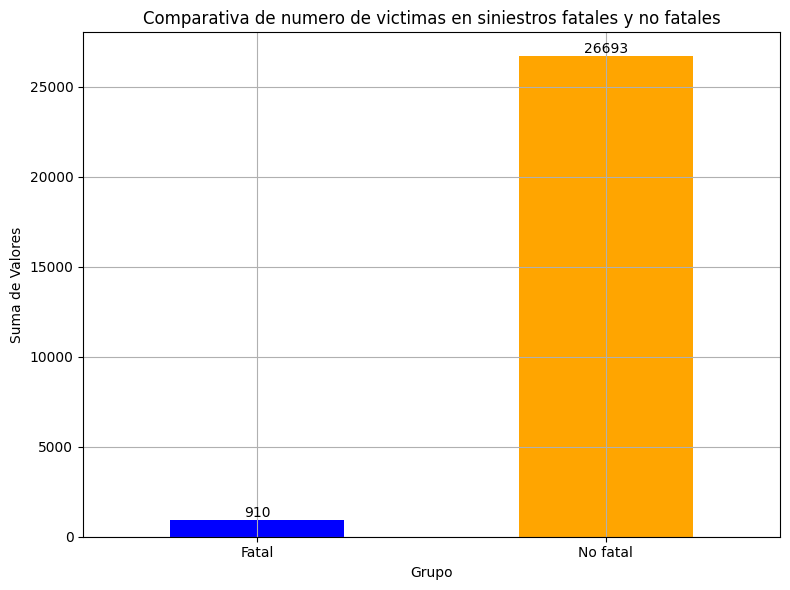

In [64]:
# Convertir la columna booleana a una columna categórica
lesiones_df['Grupo'] = lesiones_df['FATAL'].map({True: 'Fatal', False: 'No fatal'})

# Calcular la suma de los valores para cada grupo
grouped_data = lesiones_df.groupby('Grupo')['N_VICTIMAS'].sum()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(8, 6))

# Crear barras para cada grupo
grouped_data.plot(kind='bar', color=['blue', 'orange'])

# Agregar etiquetas de valor a las barras
for i, value in enumerate(grouped_data):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.xlabel('Grupo')
plt.ylabel('Suma de Valores')
plt.title('Comparativa de numero de victimas en siniestros fatales y no fatales')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
lesiones_df.drop(columns='Grupo', inplace=True)

C:\Users\Luka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='N_VICTIMAS', ylabel='Count'>

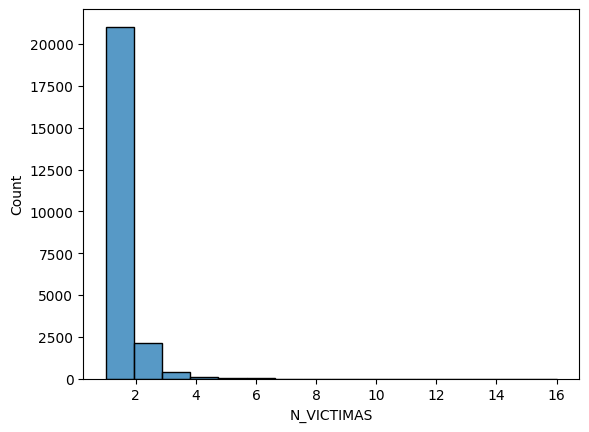

In [65]:
plt.figure()
sns.histplot(data=lesiones_df, x='N_VICTIMAS')

C:\Users\Luka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='N_VICTIMAS', ylabel='Count'>

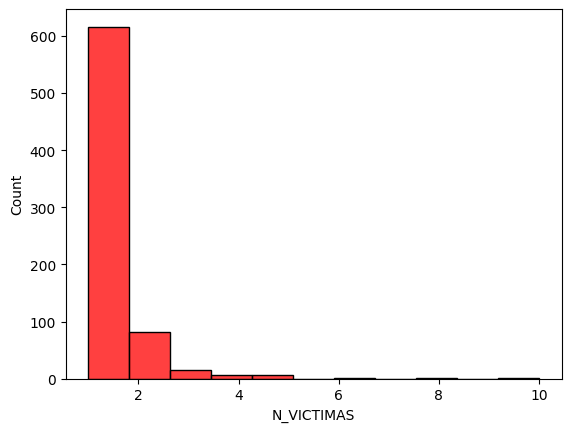

In [66]:
plt.figure()
sns.histplot(data=lesiones_df[lesiones_df['FATAL'] == True ], x='N_VICTIMAS', color='Red')

Se puede observar que en gran medida los registros de siniestros con victimas no fatales y fatales implican de una a dos victimas

## 2.2 ```TIPO_DE_CALLE```

C:\Users\Luka\AppData\Local\Temp\ipykernel_1868\1862109409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = lesiones_df.groupby(['TIPO_DE_CALLE', 'FATAL']).size().unstack()


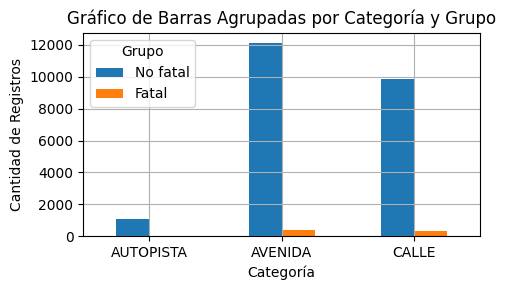

In [67]:
# Calcular el conteo de registros para cada categoría y grupo
grouped_data = lesiones_df.groupby(['TIPO_DE_CALLE', 'FATAL']).size().unstack()

# Crear el gráfico de barras agrupadas
grouped_data.plot(kind='bar', figsize=(5, 3))

# Personalizar el gráfico
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Registros')
plt.title('Gráfico de Barras Agrupadas por Categoría y Grupo')
plt.xticks(rotation=0)
plt.legend(title='Grupo', labels=['No fatal', 'Fatal'])
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoria de los siniestos ocurren en las ``avenida`` y las ``calles``, tambien se puede observar que en las ``autopistas`` hay pocos siniestros y casi ningùn siniestro ``Fatal``

## 2.3 ```COMUNA```

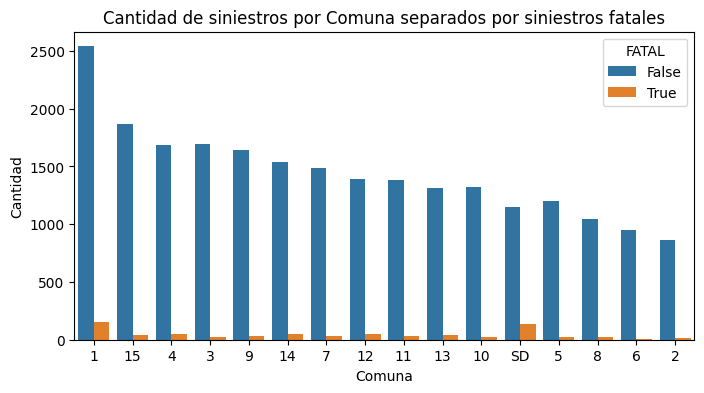

In [68]:
# Calcular la frecuencia de cada categoría
comuna_counts = lesiones_df['COMUNA'].value_counts()

# Ordenar las comunas de menor a mayor frecuencia
comuna_order = comuna_counts.index

# Crear el gráfico de barras con orden de menor a mayor
plt.figure(figsize=(8, 4))
sns.countplot(data=lesiones_df, x='COMUNA', hue='FATAL', order=comuna_order)
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.title('Cantidad de siniestros por Comuna separados por siniestros fatales')
plt.legend(title='FATAL', loc='upper right')  # Agregar leyenda
plt.show()

Se puede observar los incidentes ocurridos en las diferentes comunas siendo en donde mas se presentan es en la 'comuna 1' y en donde menos es en la 'comuna 2'

## 2.4 ```VICTIMA``` Y ```ACUSADO```

In [69]:
# Obtener las frecuencias_victimas de cada valor en la columna 'VICTIMA'
frecuencias_victimas = lesiones_df.loc[lesiones_df['VICTIMA'] != 'SD', 'VICTIMA'].value_counts()

# Definir un umbral para el número de valores únicos que se mostrarán individualmente
umbral = 4

# Si hay más de umbral valores únicos, agrupar los menos frecuentes en 'Otros'
if len(frecuencias_victimas) > umbral:
    top_valores_victimas = frecuencias_victimas[:umbral]
    otros_valores = frecuencias_victimas[umbral:].sum()
    top_valores_victimas['Otros'] = otros_valores
else:
    top_valores_victimas = frecuencias_victimas


# Obtener las frecuencias_acusado de cada valor en la columna 'ACUSADO'
frecuencias_acusado = lesiones_df.loc[lesiones_df['ACUSADO'] != 'SD', 'ACUSADO'].value_counts()

# Definir un umbral para el número de valores únicos que se mostrarán individualmente
umbral = 6


# Si hay más de umbral valores únicos, agrupar los menos frecuentes en 'Otros'
if len(frecuencias_acusado) > umbral:
    top_valores_acusado = frecuencias_acusado[:umbral]
    otros_valores = frecuencias_acusado[umbral:].sum()
    top_valores_acusado['Otros'] = otros_valores
else:
    top_valores_acusado = frecuencias_acusado

Creo que la categoria 'otros' para las columnas ```VICTIMA``` Y ```ACUSADO``` para se mejore la visibilidad en la visualizaciòn y elimino los que no tienen datos

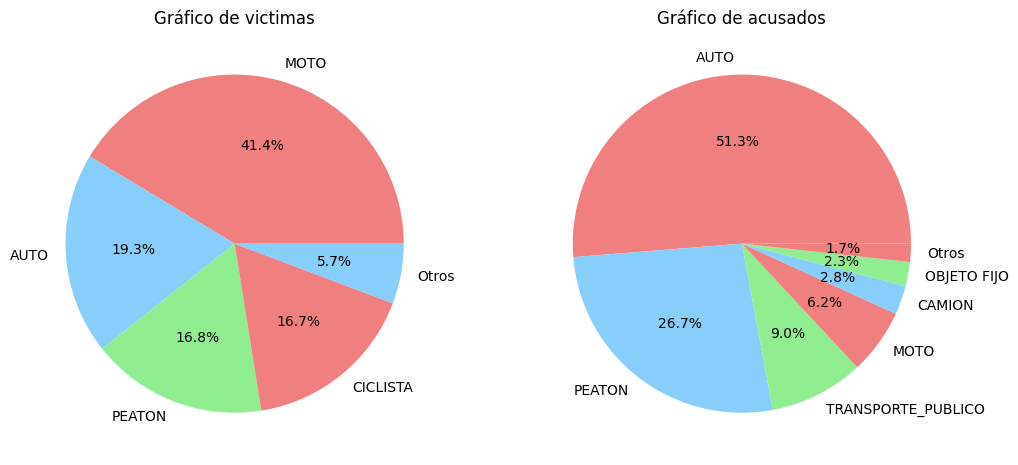

In [70]:
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer gráfico de torta
ax1.pie(top_valores_victimas, labels=top_valores_victimas.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax1.set_title('Gráfico de victimas')


# Segundo gráfico de torta
ax2.pie(top_valores_acusado, labels=top_valores_acusado.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax2.set_title('Gráfico de acusados')


plt.show()

Las victimas en la mayoria de casos suelen ser las ```MOTOS``` como era de esperase y los acusados suelen ser los ```AUTOS```

## 2.5 ```FECHA_Y_HORA```

C:\Users\Luka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


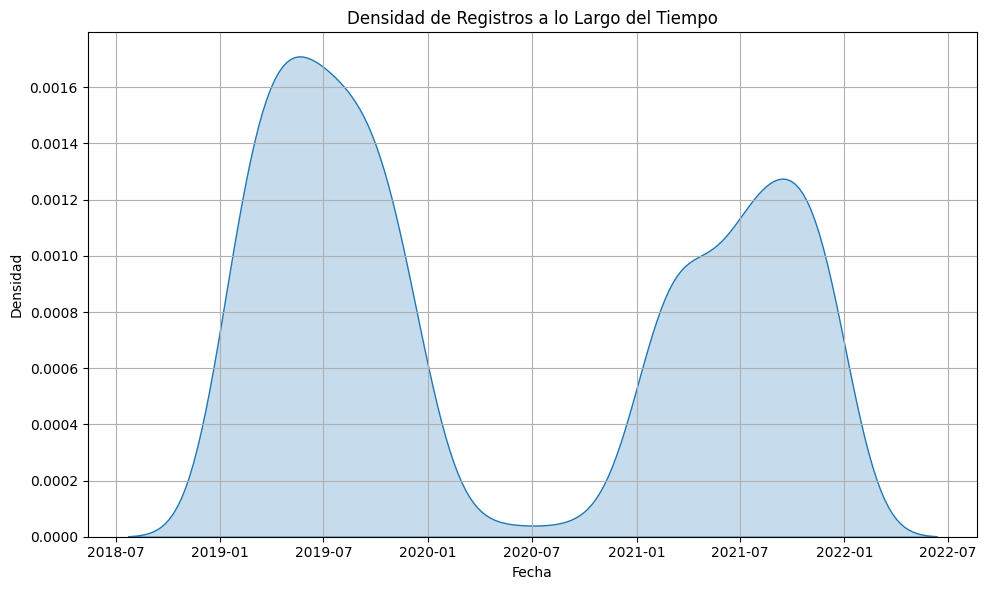

In [71]:
# Crear un gráfico de densidad de kernel utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=lesiones_df['FECHA_Y_HORA'], fill=True)

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Densidad')
plt.title('Densidad de Registros a lo Largo del Tiempo')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Atravez de este grafico de densidad de kernel podemos ver a lo largo del tiempo como se presenta ``una distribuciòn Bimodal``, como su pico llegò en el '2019' y un valle a mediados del '2020' y como luego este empieza a ascender nuevamente hasta lelgar a su segundo pico a mediados del 2021 siendo este no mayor al anterior pico mencionado.